# Data Analysis Case study

## Overview

1. **Data Loading & Overview** 
2. **Extensive EDA** 
3. **Data Preparation**
4. **Baseline Random Forest**
5. **Feature Selection** 
6. **Hyperparameter Tuning** 



## Part 1: Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv("AI_Impact_On_Jobs_2030_piped.csv")

In [3]:
df.shape

(3000, 29)

In [4]:
# Quick overview
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Experience_Band_Code,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,4,Middle,1,Security & Protective Services,0,Manual_Trade_Service,0,2.0,2.0,0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,4,High,2,Research & Development,1,Digital_Creative,1,0.0,3.0,1
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,1,High,2,Construction,2,Manual_Trade_Service,0,2.0,0.0,2
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,3,High,2,Digital & Technology,3,Digital_Creative,1,1.0,3.0,3
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,4,Middle,1,Finance & Professional Services,4,Private_Professional,2,1.0,0.0,4


In [5]:
df['Income_Band'].value_counts()

Income_Band
Middle    1742
High      1247
Low         11
Name: count, dtype: int64

In [6]:
df['Labour_Group'].value_counts()

Labour_Group
Manual_Trade_Service    1028
Digital_Creative         958
Private_Professional     574
Public_Sector            440
Name: count, dtype: int64

In [7]:
df['Job_Title'].value_counts()

Job_Title
Software Engineer      175
UX Researcher          167
Data Scientist         167
Teacher                166
Graphic Designer       160
HR Specialist          157
Construction Worker    156
Retail Worker          155
Security Guard         154
Truck Driver           153
Financial Analyst      151
Research Scientist     149
Nurse                  142
Chef                   141
AI Engineer            140
Mechanic               136
Marketing Manager      134
Customer Support       133
Lawyer                 132
Doctor                 132
Name: count, dtype: int64

In [9]:
df['Job_Title'].unique()

array(['Security Guard', 'Research Scientist', 'Construction Worker',
       'Software Engineer', 'Financial Analyst', 'AI Engineer',
       'Mechanic', 'Teacher', 'HR Specialist', 'Customer Support',
       'UX Researcher', 'Lawyer', 'Data Scientist', 'Graphic Designer',
       'Retail Worker', 'Doctor', 'Truck Driver', 'Chef', 'Nurse',
       'Marketing Manager'], dtype=object)

<Axes: >

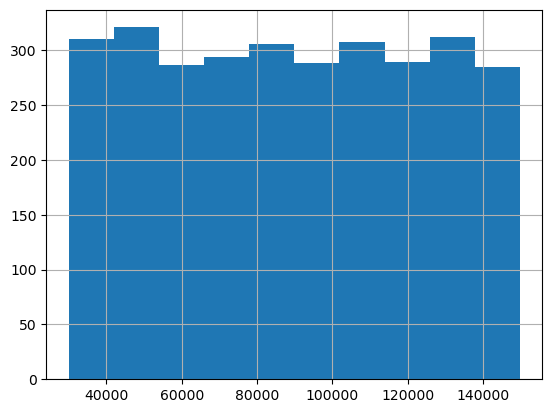

In [10]:
df['Average_Salary'].hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

## Part 2: Extensive EDA

### 2.1 Target Variable Distribution

In [12]:
# Target distribution
df['Risk_Category'].value_counts()

Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64

In [13]:
df['Risk_Category'].value_counts(normalize=True) * 100

Risk_Category
Medium    50.700000
High      24.666667
Low       24.633333
Name: proportion, dtype: float64

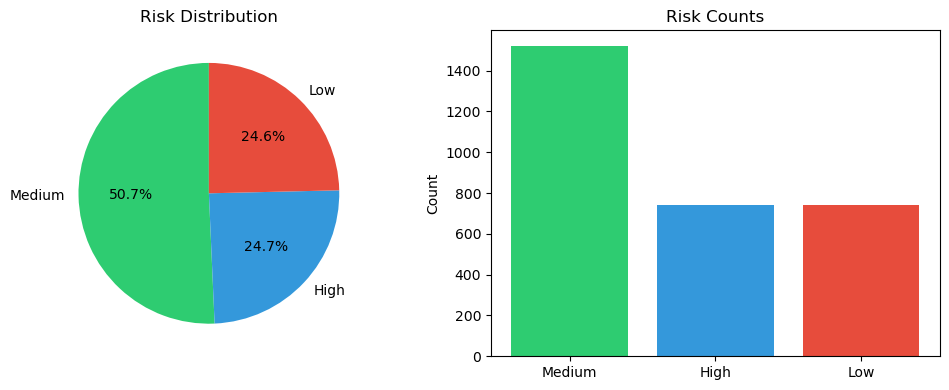

In [14]:
# Visualise target
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

Risk_counts = df['Risk_Category'].value_counts()

# Pie chart
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].pie(Risk_counts, labels=['Medium', 'High', 'Low'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Risk Distribution')

# Bar chart
axes[1].bar(['Medium', 'High', 'Low'], Risk_counts, color=colors)
axes[1].set_ylabel('Count')
axes[1].set_title('Risk Counts')

plt.tight_layout()
plt.show()

### 2.2 Missing Values Check

In [15]:
# Check missing values
df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
Experience_Band                0
Experience_Band_Code           0
Income_Band                    0
Income_Band_Code               0
Job_Sector                     0
Job_Sector_Code                0
Labour_Group                   0
Labour_Group_Code              0
Risk_Category_Code             0
Education_Level_Code           0
Job_Title_Code                 0
dtype: int64

In [16]:
numerical_cols = df.select_dtypes("number")
numerical_cols

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Experience_Band_Code,Income_Band_Code,Job_Sector_Code,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,...,0.72,0.94,0.00,4,1,0,0,2.0,2.0,0
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,...,0.62,0.38,0.98,4,2,1,1,0.0,3.0,1
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,...,0.68,0.61,0.83,1,2,2,0,2.0,0.0,2
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,...,0.93,0.73,0.33,3,2,3,1,1.0,3.0,3
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,...,0.17,0.02,0.42,4,1,4,2,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,111319,6,0.24,1.18,0.20,0.73,0.37,0.99,0.07,0.08,...,0.33,0.76,0.45,2,2,13,3,0.0,1.0,15
2996,44363,29,0.65,0.74,0.35,0.23,0.48,0.05,0.88,0.56,...,0.80,0.61,0.20,4,1,9,1,1.0,3.0,10
2997,61325,23,0.64,0.94,0.39,0.28,0.62,0.73,0.21,0.96,...,0.29,0.48,0.57,4,1,3,1,1.0,2.0,12
2998,110296,7,0.95,1.23,0.46,0.21,0.18,0.14,0.22,0.55,...,0.55,0.34,0.70,2,2,11,1,1.0,3.0,13


In [17]:
numerical_cols.columns

Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10', 'Experience_Band_Code',
       'Income_Band_Code', 'Job_Sector_Code', 'Labour_Group_Code',
       'Risk_Category_Code', 'Education_Level_Code', 'Job_Title_Code'],
      dtype='object')

### 2.3 Numerical Features Analysis

In [18]:
# Statistical summary
df[numerical_cols.columns].describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Experience_Band_Code,Income_Band_Code,Job_Sector_Code,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,...,0.502843,0.501433,0.493627,2.783333,1.412000,7.585333,1.142000,1.000333,1.46100,9.341333
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,...,0.289832,0.285818,0.286464,1.206182,0.499672,4.873394,1.049223,0.702257,1.11754,5.730192
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,...,0.250000,0.260000,0.250000,2.000000,1.000000,3.000000,0.000000,1.000000,0.00000,4.000000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,...,0.500000,0.500000,0.490000,3.000000,1.000000,7.000000,1.000000,1.000000,1.00000,9.000000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,...,0.750000,0.740000,0.740000,4.000000,2.000000,12.000000,2.000000,1.000000,2.00000,14.000000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,2.000000,16.000000,3.000000,2.000000,3.00000,19.000000


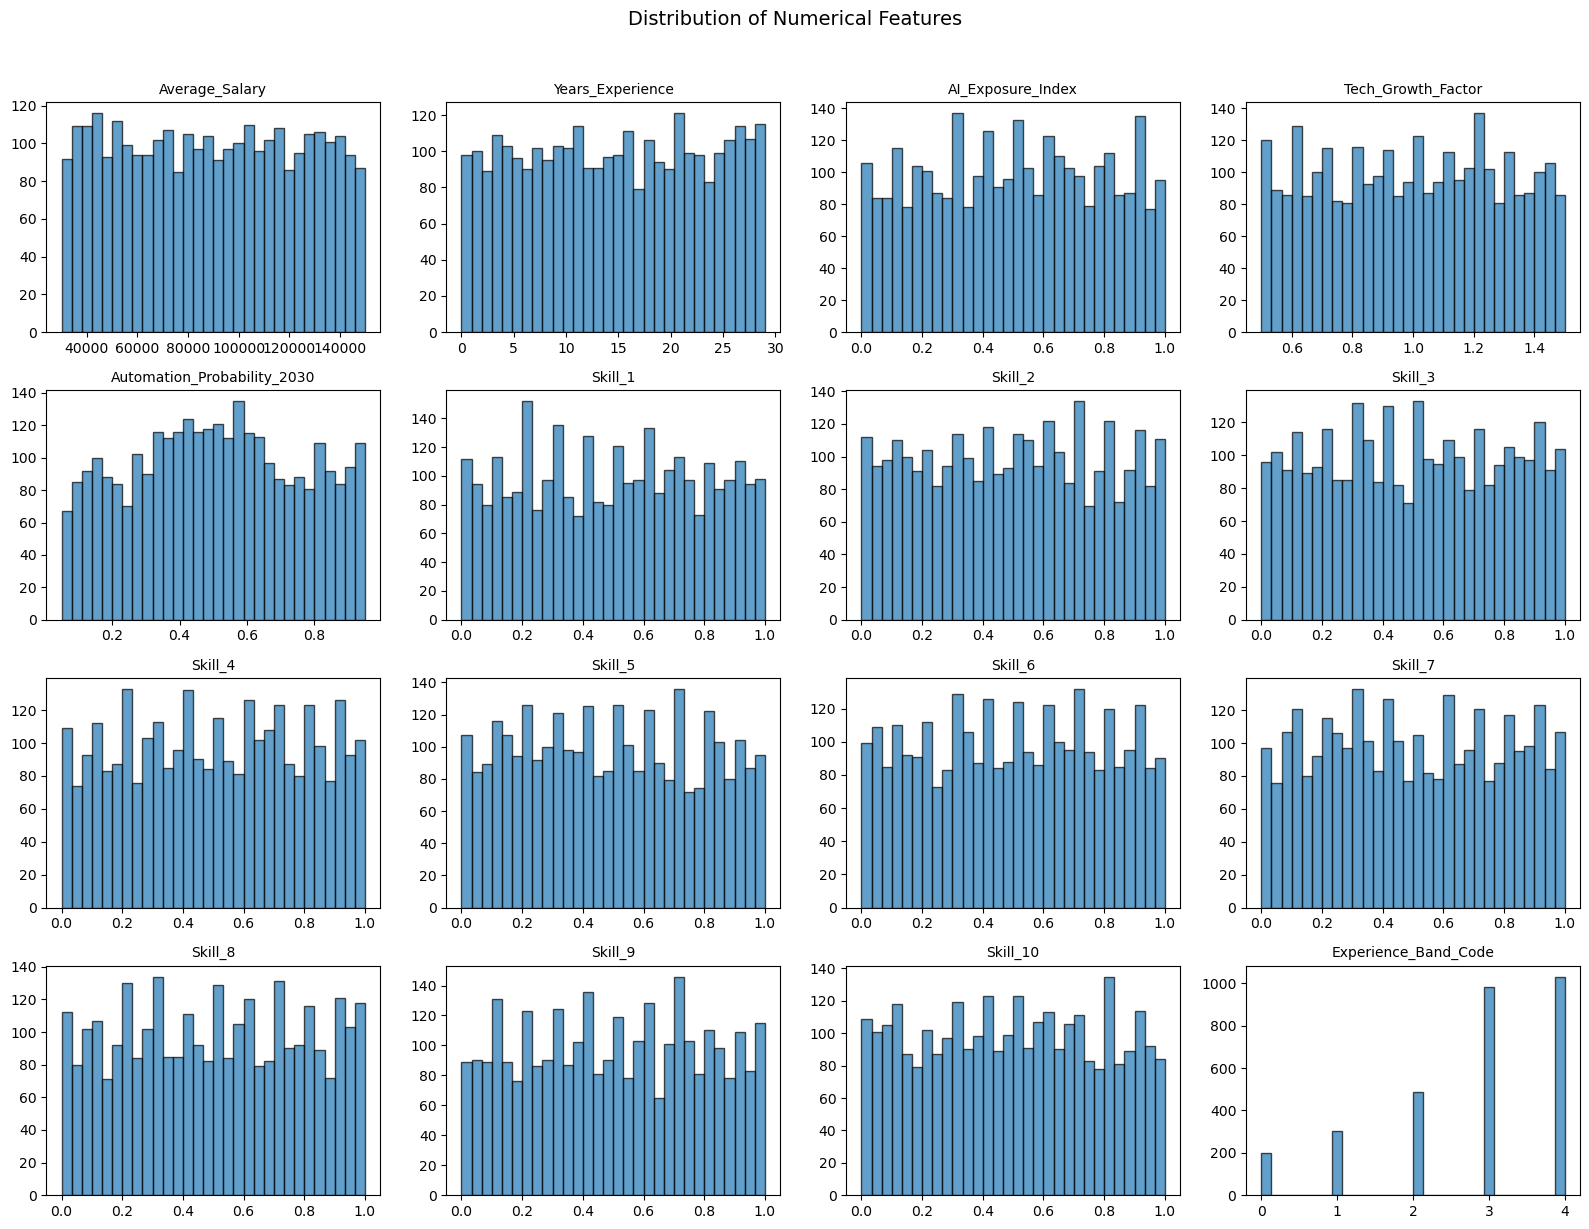

In [19]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
# axes is a 4x4 array of subplots
# axes[0,0]  axes[0,1]  axes[0,2] axes[0,3]
# axes[1,0]  axes[1,1]  axes[1,2] ...
# ...

# To access each subplot, you need row and column indices:
# axes[0,0].plot(data1)
# axes[0,1].plot(data2)
# etc...
axes = axes.ravel()

for idx, col in enumerate(numerical_cols.columns[:16]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [21]:
df.groupby('Risk_Category')['Average_Salary'].mean()

Risk_Category
High      87359.441892
Low       89166.776725
Medium    90451.414859
Name: Average_Salary, dtype: float64

In [22]:
df['Fin'] = np.where(
    (df['Income_Band'] == 'High') & (df['Risk_Category'] == 'High'),
    df['Job_Title'],
    "No result"
)

df['Fin'].value_counts()

Fin
No result              2709
Construction Worker      65
Retail Worker            62
Security Guard           62
Customer Support         51
Truck Driver             51
Name: count, dtype: int64

### 2.5 Categorical Features Analysis

In [23]:
# Identify categorical columns


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Job_Title',
 'Education_Level',
 'Risk_Category',
 'Experience_Band',
 'Income_Band',
 'Job_Sector',
 'Labour_Group',
 'Fin']

In [24]:
df.groupby('Job_Title')['Risk_Category'].count()

Job_Title
AI Engineer            140
Chef                   141
Construction Worker    156
Customer Support       133
Data Scientist         167
Doctor                 132
Financial Analyst      151
Graphic Designer       160
HR Specialist          157
Lawyer                 132
Marketing Manager      134
Mechanic               136
Nurse                  142
Research Scientist     149
Retail Worker          155
Security Guard         154
Software Engineer      175
Teacher                166
Truck Driver           153
UX Researcher          167
Name: Risk_Category, dtype: int64

In [25]:
df[['AI_Exposure_Index','Automation_Probability_2030']].corr()

,AI_Exposure_Index,Automation_Probability_2030
AI_Exposure_Index,1.00000,0.01432
Automation_Probability_2030,0.01432,1.00000


<Axes: xlabel='AI_Exposure_Index', ylabel='Automation_Probability_2030'>

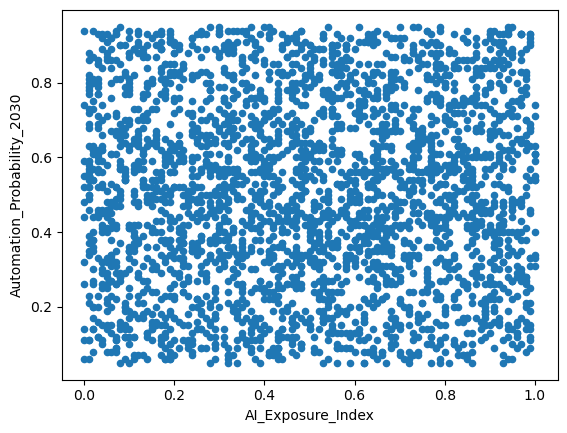

In [26]:
df.plot(x='AI_Exposure_Index', y='Automation_Probability_2030', kind='scatter')

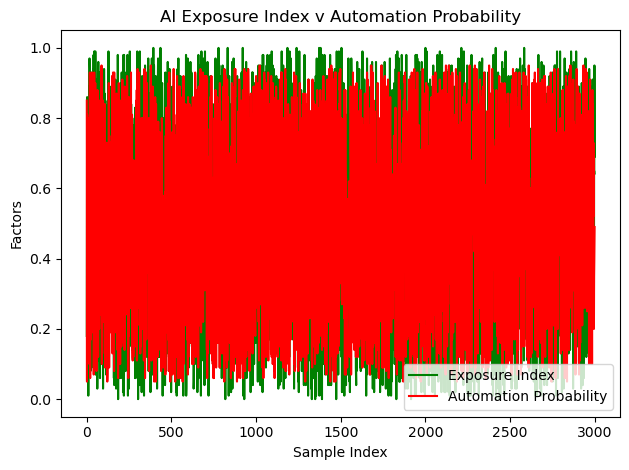

In [27]:
plt.figure()
plt.plot(df['AI_Exposure_Index'], label="Exposure Index", color="green")
plt.plot(df['Automation_Probability_2030'], label="Automation Probability", color="red")
plt.xlabel("Sample Index")
plt.ylabel("Factors")
plt.title("AI Exposure Index v Automation Probability")
plt.legend()
plt.tight_layout()
plt.show()

### 2.6 Correlation Analysis

In [28]:
# Correlation with target
num_cols = numerical_cols.columns.tolist()
num_cols

['Average_Salary',
 'Years_Experience',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030',
 'Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10',
 'Experience_Band_Code',
 'Income_Band_Code',
 'Job_Sector_Code',
 'Labour_Group_Code',
 'Risk_Category_Code',
 'Education_Level_Code',
 'Job_Title_Code']

In [29]:
correlation_num = df[num_cols].corr()
correlation_num

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Experience_Band_Code,Income_Band_Code,Job_Sector_Code,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code
Average_Salary,1.000000,0.017389,-0.020196,-0.002214,-0.013367,-0.016888,-0.021382,0.019271,-0.024862,-0.010809,...,-0.005487,-0.007120,0.041655,0.013763,0.856137,-0.005124,0.010852,-0.018352,0.014944,-0.001627
Years_Experience,0.017389,1.000000,0.034599,-0.023371,-0.017676,0.011118,0.009353,-0.016043,-0.025986,-0.001974,...,0.030740,-0.028956,0.011798,0.929644,0.010033,-0.000877,-0.004061,-0.009110,0.039526,-0.010619
AI_Exposure_Index,-0.020196,0.034599,1.000000,0.016485,0.014320,-0.005675,0.018888,-0.011234,0.022386,-0.010878,...,-0.007744,0.003171,0.004656,0.030403,-0.004479,0.034845,-0.002447,0.017068,0.015260,0.038892
Tech_Growth_Factor,-0.002214,-0.023371,0.016485,1.000000,0.025538,0.001253,0.004276,0.007915,-0.013198,-0.017557,...,-0.011194,0.017333,-0.033288,-0.021744,-0.003536,0.046149,-0.012402,0.022670,-0.011959,0.032509
Automation_Probability_2030,-0.013367,-0.017676,0.014320,0.025538,1.000000,0.030947,0.024247,-0.020198,0.005963,-0.026349,...,-0.016452,0.001269,0.002665,-0.025274,0.009266,0.008532,-0.686357,0.924843,-0.014070,-0.046918
Skill_1,-0.016888,0.011118,-0.005675,0.001253,0.030947,1.000000,-0.015902,0.038025,0.002860,-0.007998,...,-0.027314,-0.005368,-0.014475,0.010517,-0.024661,-0.022948,-0.014042,0.031474,0.013055,-0.029351
Skill_2,-0.021382,0.009353,0.018888,0.004276,0.024247,-0.015902,1.000000,-0.038053,0.006365,-0.023542,...,0.008480,0.027924,-0.018727,0.008983,-0.008108,-0.014058,-0.007194,0.018234,-0.013727,-0.013872
Skill_3,0.019271,-0.016043,-0.011234,0.007915,-0.020198,0.038025,-0.038053,1.000000,0.006107,-0.026576,...,0.007096,-0.020222,0.004567,-0.012488,0.014646,-0.011298,-0.005387,-0.016169,-0.000580,-0.008172
Skill_4,-0.024862,-0.025986,0.022386,-0.013198,0.005963,0.002860,0.006365,0.006107,1.000000,-0.005616,...,-0.011918,-0.036873,0.013784,-0.019132,-0.029203,-0.013014,-0.016686,-0.006440,0.021920,-0.005375
Skill_5,-0.010809,-0.001974,-0.010878,-0.017557,-0.026349,-0.007998,-0.023542,-0.026576,-0.005616,1.000000,...,0.006939,0.044185,-0.026335,0.010055,0.006692,-0.002984,-0.004075,-0.019554,0.027368,0.005296


In [30]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy X to avoid warnings
X_encoded = df.copy()

# Encode each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [31]:
X_encoded

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code,Fin
0,15,45795,28,2,0.18,1.28,0.85,0,0.45,0.10,...,2,1,14,0,1,0,2.0,2.0,0,2
1,13,133355,20,3,0.62,1.11,0.05,1,0.02,0.52,...,0,2,12,1,0,1,0.0,3.0,1,2
2,2,146216,2,1,0.86,1.18,0.81,0,0.01,0.94,...,0,2,1,2,1,0,2.0,0.0,2,0
3,16,136530,13,3,0.39,0.68,0.60,2,0.43,0.21,...,0,2,5,3,0,1,1.0,3.0,3,2
4,6,70397,22,1,0.52,1.46,0.64,2,0.75,0.54,...,2,1,7,4,2,2,1.0,0.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,111319,6,0,0.24,1.18,0.20,1,0.73,0.37,...,0,2,8,13,3,3,0.0,1.0,15,2
2996,19,44363,29,3,0.65,0.74,0.35,2,0.23,0.48,...,2,1,4,9,0,1,1.0,3.0,10,2
2997,4,61325,23,2,0.64,0.94,0.39,2,0.28,0.62,...,2,1,5,3,0,1,1.0,2.0,12,2
2998,7,110296,7,3,0.95,1.23,0.46,2,0.21,0.18,...,0,2,2,11,0,1,1.0,3.0,13,2


In [32]:
X_encoded['Risk_Category'].value_counts()

Risk_Category
2    1521
0     740
1     739
Name: count, dtype: int64

In [ ]:
#Medium = 2, High = 0, Low = 1

In [34]:
numeric_cols = X_encoded.select_dtypes("number")
numeric_cols

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code,Fin
0,15,45795,28,2,0.18,1.28,0.85,0,0.45,0.10,...,2,1,14,0,1,0,2.0,2.0,0,2
1,13,133355,20,3,0.62,1.11,0.05,1,0.02,0.52,...,0,2,12,1,0,1,0.0,3.0,1,2
2,2,146216,2,1,0.86,1.18,0.81,0,0.01,0.94,...,0,2,1,2,1,0,2.0,0.0,2,0
3,16,136530,13,3,0.39,0.68,0.60,2,0.43,0.21,...,0,2,5,3,0,1,1.0,3.0,3,2
4,6,70397,22,1,0.52,1.46,0.64,2,0.75,0.54,...,2,1,7,4,2,2,1.0,0.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,111319,6,0,0.24,1.18,0.20,1,0.73,0.37,...,0,2,8,13,3,3,0.0,1.0,15,2
2996,19,44363,29,3,0.65,0.74,0.35,2,0.23,0.48,...,2,1,4,9,0,1,1.0,3.0,10,2
2997,4,61325,23,2,0.64,0.94,0.39,2,0.28,0.62,...,2,1,5,3,0,1,1.0,2.0,12,2
2998,7,110296,7,3,0.95,1.23,0.46,2,0.21,0.18,...,0,2,2,11,0,1,1.0,3.0,13,2


In [35]:
# Correlation with target
X_num_cols = numeric_cols.columns.tolist()
X_num_cols

['Job_Title',
 'Average_Salary',
 'Years_Experience',
 'Education_Level',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030',
 'Risk_Category',
 'Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10',
 'Experience_Band',
 'Experience_Band_Code',
 'Income_Band',
 'Income_Band_Code',
 'Job_Sector',
 'Job_Sector_Code',
 'Labour_Group',
 'Labour_Group_Code',
 'Risk_Category_Code',
 'Education_Level_Code',
 'Job_Title_Code',
 'Fin']

In [37]:
X_correlation_num = X_encoded[X_num_cols].corr()
X_correlation_num

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Income_Band,Income_Band_Code,Job_Sector,Job_Sector_Code,Labour_Group,Labour_Group_Code,Risk_Category_Code,Education_Level_Code,Job_Title_Code,Fin
Job_Title,1.000000,-0.029562,0.022467,0.007126,-0.001646,-0.010343,0.048045,-0.088692,-0.002433,-0.005482,...,0.038797,-0.035663,0.414108,0.040728,0.030077,0.073106,0.047305,0.001490,-0.051501,0.338392
Average_Salary,-0.029562,1.000000,0.017389,0.012031,-0.020196,-0.002214,-0.013367,0.036417,-0.016888,-0.021382,...,-0.849856,0.856137,-0.038438,-0.005124,-0.009610,0.010852,-0.018352,0.014944,-0.001627,0.088212
Years_Experience,0.022467,0.017389,1.000000,0.030840,0.034599,-0.023371,-0.017676,0.010720,0.011118,0.009353,...,-0.009085,0.010033,0.005481,-0.000877,0.003351,-0.004061,-0.009110,0.039526,-0.010619,-0.020875
Education_Level,0.007126,0.012031,0.030840,1.000000,0.016101,-0.026383,-0.005912,-0.009769,0.009211,-0.001625,...,-0.020200,0.014628,0.001542,0.039153,-0.002260,-0.006311,-0.001053,0.792224,0.031524,-0.032021
AI_Exposure_Index,-0.001646,-0.020196,0.034599,0.016101,1.000000,0.016485,0.014320,-0.012491,-0.005675,0.018888,...,-0.001378,-0.004479,0.001974,0.034845,0.005826,-0.002447,0.017068,0.015260,0.038892,0.014430
Tech_Growth_Factor,-0.010343,-0.002214,-0.023371,-0.026383,0.016485,1.000000,0.025538,0.005341,0.001253,0.004276,...,0.004644,-0.003536,0.015553,0.046149,0.022956,-0.012402,0.022670,-0.011959,0.032509,0.009454
Automation_Probability_2030,0.048045,-0.013367,-0.017676,-0.005912,0.014320,0.025538,1.000000,-0.398416,0.030947,0.024247,...,-0.003312,0.009266,0.118070,0.008532,-0.262469,-0.686357,0.924843,-0.014070,-0.046918,0.120530
Risk_Category,-0.088692,0.036417,0.010720,-0.009769,-0.012491,0.005341,-0.398416,1.000000,-0.027849,-0.016641,...,-0.041239,0.038048,-0.264680,0.086720,-0.087207,0.349175,-0.424338,-0.018386,0.142991,-0.134098
Skill_1,-0.002433,-0.016888,0.011118,0.009211,-0.005675,0.001253,0.030947,-0.027849,1.000000,-0.015902,...,0.022831,-0.024661,-0.006720,-0.022948,0.003293,-0.014042,0.031474,0.013055,-0.029351,-0.009032
Skill_2,-0.005482,-0.021382,0.009353,-0.001625,0.018888,0.004276,0.024247,-0.016641,-0.015902,1.000000,...,0.015176,-0.008108,-0.014996,-0.014058,0.000036,-0.007194,0.018234,-0.013727,-0.013872,0.000691


In [38]:
corr_values = X_correlation_num['Risk_Category'].sort_values(ascending=False)[1:]
corr_values

Labour_Group_Code              0.349175
Job_Title_Code                 0.142991
Job_Sector_Code                0.086720
Income_Band_Code               0.038048
Average_Salary                 0.036417
Skill_6                        0.032932
Experience_Band_Code           0.013422
Years_Experience               0.010720
Tech_Growth_Factor             0.005341
Skill_4                        0.002547
Experience_Band               -0.001910
Skill_3                       -0.003607
Skill_8                       -0.004307
Skill_5                       -0.005846
Skill_9                       -0.006703
Education_Level               -0.009769
Skill_7                       -0.011661
AI_Exposure_Index             -0.012491
Skill_10                      -0.012988
Skill_2                       -0.016641
Education_Level_Code          -0.018386
Skill_1                       -0.027849
Income_Band                   -0.041239
Labour_Group                  -0.087207
Job_Title                     -0.088692


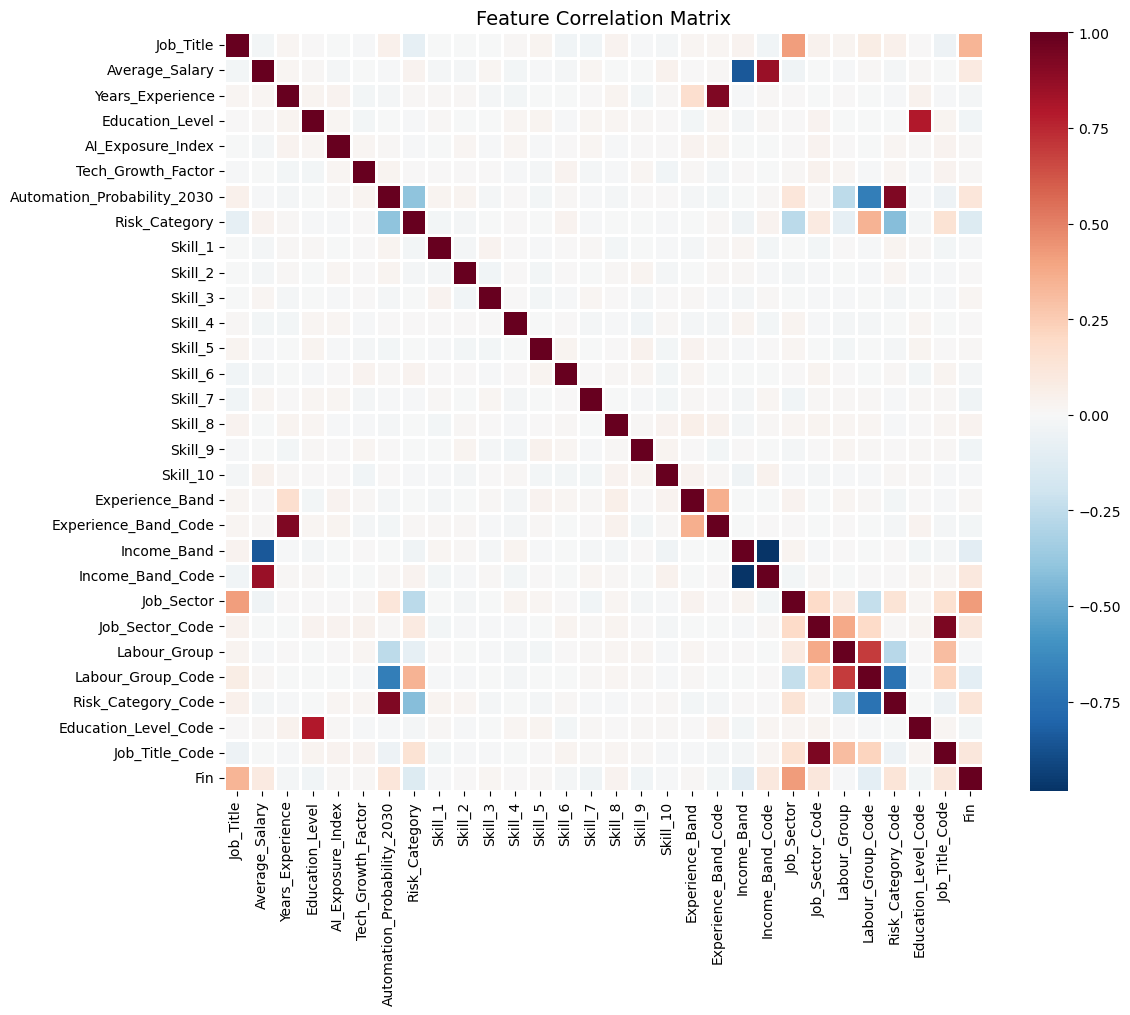

In [39]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X_encoded[X_num_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

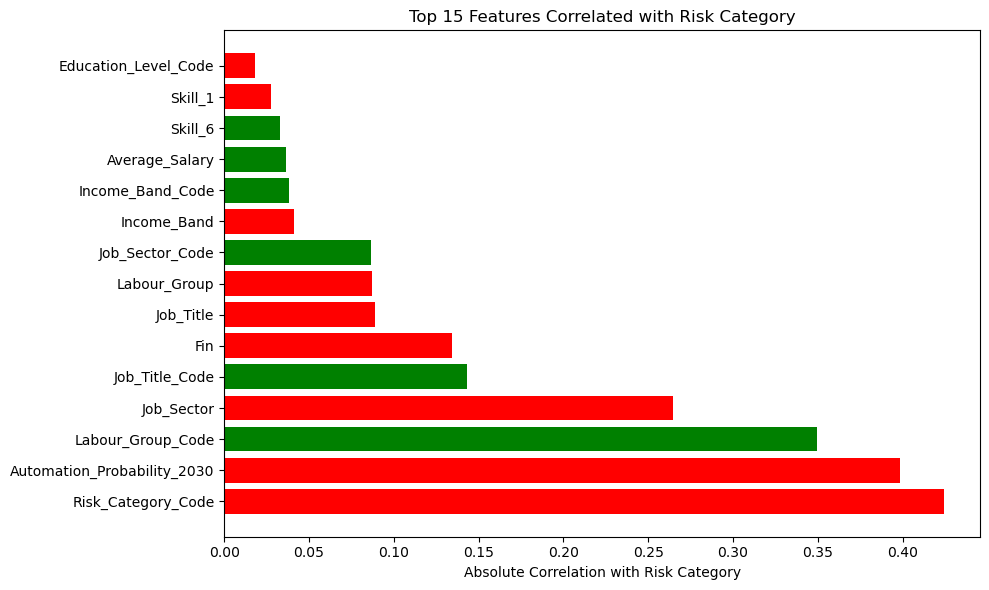

In [40]:
# Strong correlations only
plt.figure(figsize=(10, 6))
top_corr = corr_values.abs().sort_values(ascending=False).head(15)
colors = ['red' if x < 0 else 'green' for x in corr_values[top_corr.index]]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Absolute Correlation with Risk Category')
plt.title('Top 15 Features Correlated with Risk Category')
plt.tight_layout()
plt.show()

### 2.7 Key Insights from EDA
- Dataset: 3000 sample, 24.7% High Risk of Impact, 50% Medium risk of Impact.
- No missing values

## Part 3: Data Preparation

In [42]:
# Separate features and target
X = X_encoded.drop(['Automation_Probability_2030', 'Job_Sector', 'Fin', 'Job_Title', 'Education_Level', 
                    'Experience_Band','Income_Band','Labour_Group','Risk_Category'], axis=1)
y = X_encoded['Risk_Category']

In [65]:
X = X.drop('Risk_Category_Code', axis=1)
X

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band_Code,Income_Band_Code,Job_Sector_Code,Labour_Group_Code,Education_Level_Code,Job_Title_Code
0,45795,28,0.18,1.28,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,4,1,0,0,2.0,0
1,133355,20,0.62,1.11,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,4,2,1,1,3.0,1
2,146216,2,0.86,1.18,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,1,2,2,0,0.0,2
3,136530,13,0.39,0.68,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,3,2,3,1,3.0,3
4,70397,22,0.52,1.46,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,4,1,4,2,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,111319,6,0.24,1.18,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45,2,2,13,3,1.0,15
2996,44363,29,0.65,0.74,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20,4,1,9,1,3.0,10
2997,61325,23,0.64,0.94,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57,4,1,3,1,2.0,12
2998,110296,7,0.95,1.23,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70,2,2,11,1,3.0,13


In [28]:
'''
# Not required...
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy X to avoid warnings
X_encoded = X.copy()

# Encode each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
'''

In [66]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
X_train.shape[0]

2400

In [45]:
X_test.shape[0]

600

In [46]:
y_train

1267    2
610     1
1039    2
1761    0
1438    1
       ..
588     2
2272    1
553     2
1715    2
274     2
Name: Risk_Category, Length: 2400, dtype: int64

In [47]:
y_test

2782    1
2795    2
1774    2
2870    0
424     2
       ..
2695    2
2104    2
2494    2
427     1
1026    2
Name: Risk_Category, Length: 600, dtype: int64

In [48]:
y_train.mean()

np.float64(1.2604166666666667)

In [49]:
y_test.mean()

np.float64(1.26)

In [50]:
y_train.value_counts()

Risk_Category
2    1217
0     592
1     591
Name: count, dtype: int64

In [51]:
y_test.value_counts()

Risk_Category
2    304
1    148
0    148
Name: count, dtype: int64

## Part 4: Baseline Random Forest Model

In [52]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Predictions
y_pred = rf_baseline.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)

In [68]:
accuracy * 100

99.0

In [69]:
# Detailed metrics
print(classification_report(y_test, y_pred, target_names=['Medium', 'High', 'Low']))

              precision    recall  f1-score   support

      Medium       0.97      1.00      0.99       148
        High       1.00      0.99      0.99       148
         Low       0.99      0.99      0.99       304

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



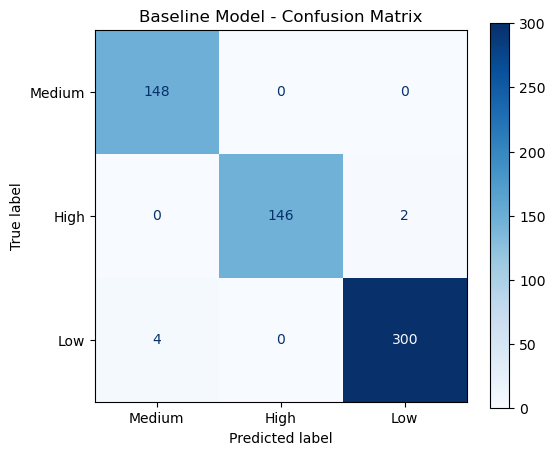

In [70]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Medium', 'High', 'Low'])
disp.plot(ax=ax, cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

## Part 5: Feature Importance & Selection

In [71]:
rf_baseline.feature_importances_

array([0.01246545, 0.00957301, 0.01278313, 0.01207477, 0.01270738,
       0.01243954, 0.01121932, 0.01239536, 0.0125833 , 0.01230857,
       0.01130321, 0.0123886 , 0.01339452, 0.01228782, 0.00372298,
       0.00156296, 0.2090427 , 0.38078239, 0.00470852, 0.23025645])

In [72]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance

,feature,importance
0,Average_Salary,0.012465
1,Years_Experience,0.009573
2,AI_Exposure_Index,0.012783
3,Tech_Growth_Factor,0.012075
4,Skill_1,0.012707
5,Skill_2,0.012440
6,Skill_3,0.011219
7,Skill_4,0.012395
8,Skill_5,0.012583
9,Skill_6,0.012309


In [73]:
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [74]:
feature_importance

,feature,importance
17,Labour_Group_Code,0.380782
19,Job_Title_Code,0.230256
16,Job_Sector_Code,0.209043
12,Skill_9,0.013395
2,AI_Exposure_Index,0.012783
4,Skill_1,0.012707
8,Skill_5,0.012583
0,Average_Salary,0.012465
5,Skill_2,0.012440
7,Skill_4,0.012395


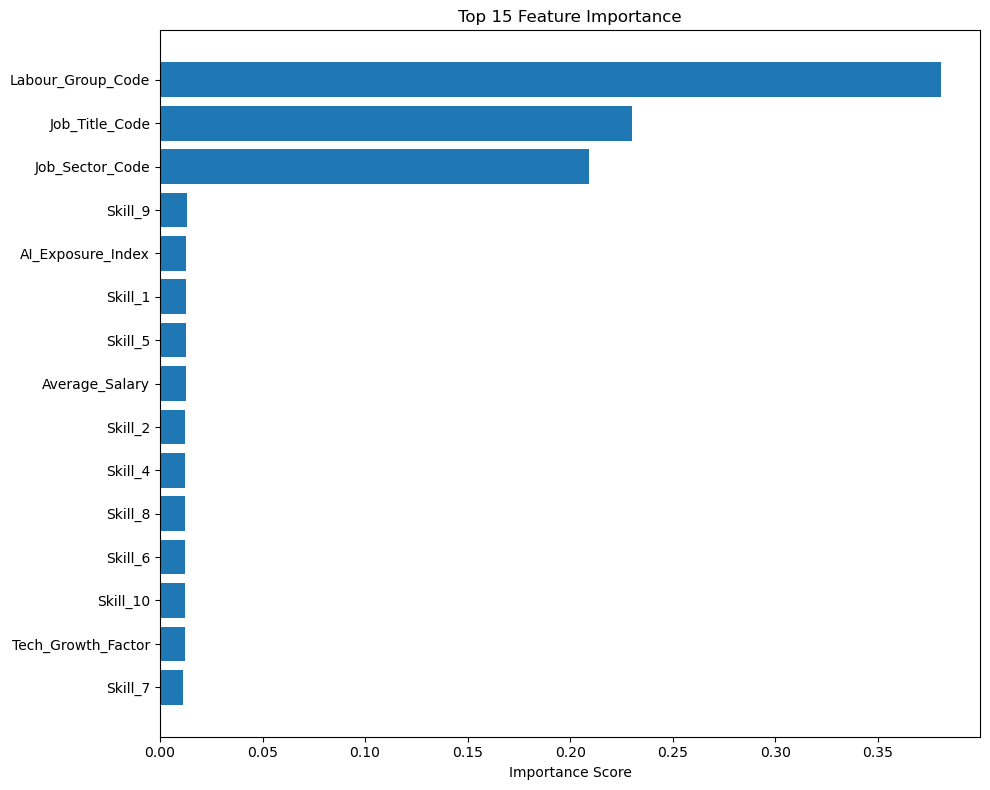

In [75]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [76]:
# Select top features
top_n = 5
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['Labour_Group_Code',
 'Job_Title_Code',
 'Job_Sector_Code',
 'Skill_9',
 'AI_Exposure_Index']

In [77]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(n_estimators=100,random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [78]:
accuracy_selected * 100

99.33333333333333

In [79]:
(accuracy_selected - accuracy) * 100

0.33333333333332993

In [80]:
import shap

In [81]:
X_sample = X_train_selected.sample(2000)

In [82]:
explainer = shap.TreeExplainer(rf_selected)

In [83]:
shap_values = explainer.shap_values(X_sample)

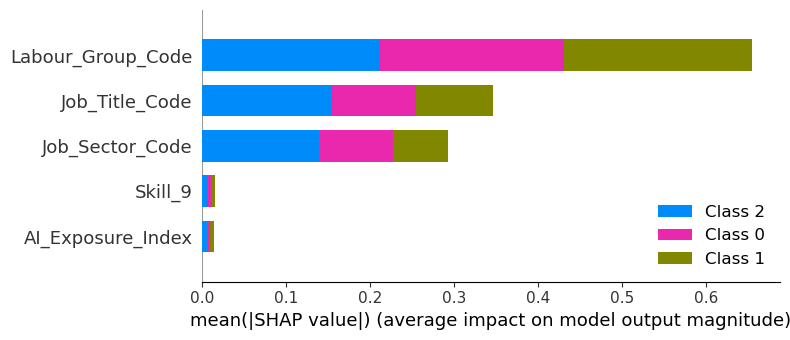

In [84]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

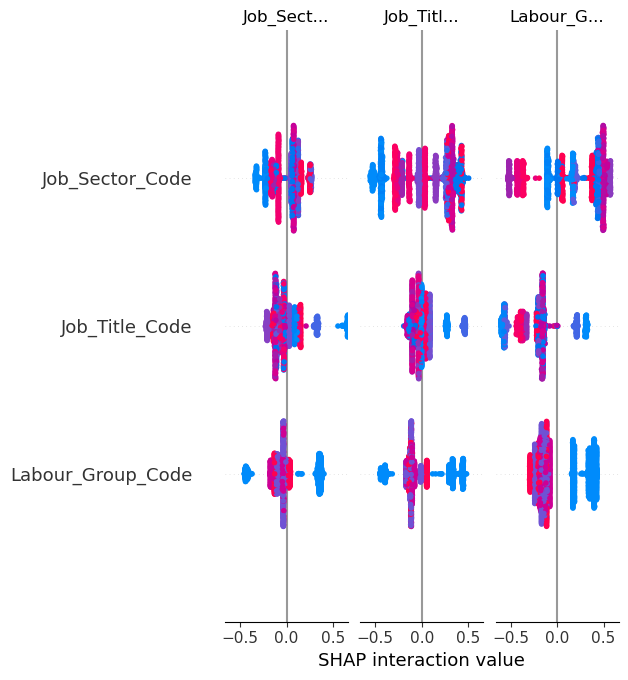

In [85]:
shap.summary_plot(shap_values, X_sample)

In [86]:
# Select top features
top_n = 3
select_features = feature_importance.head(top_n)['feature'].tolist()

select_features

['Labour_Group_Code', 'Job_Title_Code', 'Job_Sector_Code']

In [87]:
# Train model with selected features
X_train_select = X_train[select_features]
X_test_select = X_test[select_features]

new_rf_selected = RandomForestClassifier(n_estimators=100,random_state=42)
new_rf_selected.fit(X_train_select, y_train)

y_pred_selected = new_rf_selected.predict(X_test_select)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [88]:
accuracy_selected * 100

99.33333333333333

## Part 6: Hyperparameter Tuning

In [89]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [90]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [91]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [92]:
grid_search.best_score_

np.float64(0.9929166666666667)

In [93]:
# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [94]:
accuracy

0.99

In [95]:
accuracy_selected

0.9933333333333333

In [96]:
accuracy_best

0.9933333333333333

In [97]:
(accuracy_best - accuracy)*100

0.33333333333332993

In [98]:
# Final classification report
print(classification_report(y_test, y_pred_best, target_names=['Medium', 'High', 'Low']))

              precision    recall  f1-score   support

      Medium       0.97      1.00      0.99       148
        High       1.00      1.00      1.00       148
         Low       1.00      0.99      0.99       304

    accuracy                           0.99       600
   macro avg       0.99      1.00      0.99       600
weighted avg       0.99      0.99      0.99       600



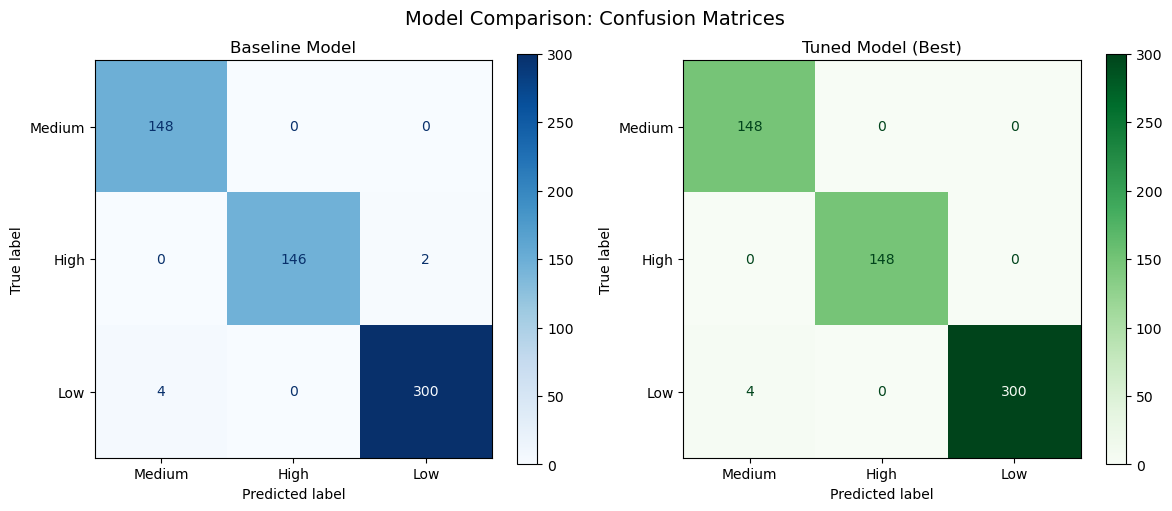

In [99]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['Medium', 'High', 'Low'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['Medium', 'High', 'Low'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

## Part 7: Final Insights & Recommendations

In [100]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})

final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
0,Labour_Group_Code,0.454400
1,Job_Title_Code,0.292802
2,Job_Sector_Code,0.228908
4,AI_Exposure_Index,0.012204
3,Skill_9,0.011685


## Remarks:
MODEL PERFORMANCE:

   • Random Forest achieved 99.33% accuracy
   
   • Using only top 3 features maintains performance
   
   • Tuning improved accuracy by 0.3%